In [1]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *

In [2]:
#IMPORTING THE DATASET AND SHOWING IT

data=pd.read_csv("D:\\Phishing Project\\Phishing_data.csv")
data

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [3]:
#SUMMARY STATISTICS OF THE DATASET

print(data.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [4]:
for column in data.columns:
    print(f"{column}: {data[column].dtype}")

qty_dot_url: int64
qty_hyphen_url: int64
qty_underline_url: int64
qty_slash_url: int64
qty_questionmark_url: int64
qty_equal_url: int64
qty_at_url: int64
qty_and_url: int64
qty_exclamation_url: int64
qty_space_url: int64
qty_tilde_url: int64
qty_comma_url: int64
qty_plus_url: int64
qty_asterisk_url: int64
qty_hashtag_url: int64
qty_dollar_url: int64
qty_percent_url: int64
qty_tld_url: int64
length_url: int64
qty_dot_domain: int64
qty_hyphen_domain: int64
qty_underline_domain: int64
qty_slash_domain: int64
qty_questionmark_domain: int64
qty_equal_domain: int64
qty_at_domain: int64
qty_and_domain: int64
qty_exclamation_domain: int64
qty_space_domain: int64
qty_tilde_domain: int64
qty_comma_domain: int64
qty_plus_domain: int64
qty_asterisk_domain: int64
qty_hashtag_domain: int64
qty_dollar_domain: int64
qty_percent_domain: int64
qty_vowels_domain: int64
domain_length: int64
domain_in_ip: int64
server_client_domain: int64
qty_dot_directory: int64
qty_hyphen_directory: int64
qty_underline_d

In [5]:
#Checking shape of dataset
data.shape

(88647, 112)

In [6]:
#Listing Features
data.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [7]:
#Dataset Infromation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


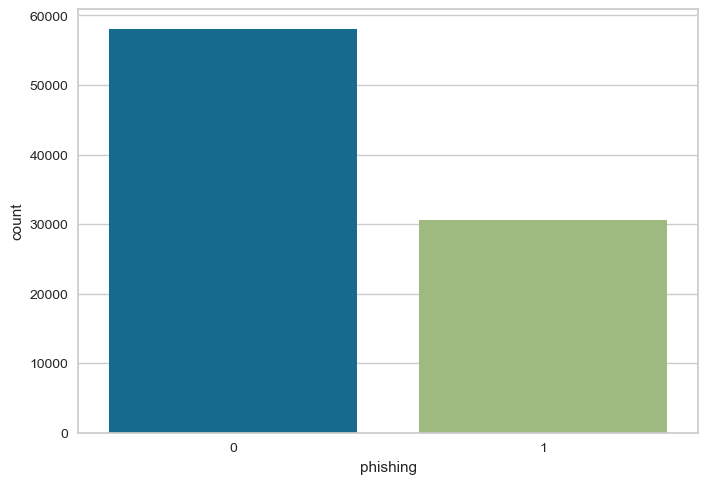

In [8]:
#VISUALIZING THE DISTRIBUTION OF THE DATASET

sns.countplot(x='phishing', data=data)
plt.show()

In [9]:
cols_to_drop = ['url_google_index',
                  'domain_google_index',
                  'qty_vowels_domain',
                  'server_client_domain',
                  'tld_present_params',
                  'time_response', 
                  'domain_spf', 
                  'qty_ip_resolved', 
                  'qty_nameservers', 
                  'qty_mx_servers', 
                  'ttl_hostname', 
                  'url_shortened']

In [10]:
data=data.drop(cols_to_drop, axis=1)

In [11]:
#PERFORMING FEATURE ENGINEERING ON DATA AND SHOWING IT
rows, columns = data.shape

original_features = list(data.columns)

dataset_array = np.array(data)

features_indices = []
attributes = ['url', 'domain', 'directory', 'file', 'params']

new_dataset = {}

for index, name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        features_indices.append([index, name.split('_')[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]


for index, attribute in features_indices:
  if attribute == 'domain':
    if f"qty_char_{attribute}" not in new_dataset.keys():
        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)
    
    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

data = pd.DataFrame(new_dataset).astype(int)
data[data<-1] = -1
data

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,8,7,-1,0,60781,-1,-1,0,0,1,2
1,223,16,0,42,9,165,0,36024,579,150,1,0,1,2
2,15,14,0,1,0,-1,0,4766,-1,-1,1,0,0,2
3,81,19,0,62,9,-1,0,20454,-1,-1,1,0,1,2
4,19,19,0,-1,-1,-1,0,53831,6998,306,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,0,8560,5509,334,0,0,0,4
88643,34,34,0,-1,-1,-1,0,26496,5046,431,0,2,0,2
88644,70,22,0,48,11,-1,0,394695,1844,712,1,0,1,1
88645,28,27,0,1,0,-1,0,47583,-1,-1,1,0,1,2


In [12]:
#PLOTTING A CORRELATION MATRIX TO IDENTIFY ANY STRONG CORRELATIONS

corr = data.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(corr, annot=True, cmap="magma")
plt.show()

In [13]:
#SUMMARY STATISTICS OF DATASET
print(data.describe())


         length_url  domain_length  domain_in_ip  directory_length  \
count  88647.000000   88647.000000  88647.000000      88647.000000   
mean      36.347615      18.560820      0.002267         10.857694   
std       46.191590       6.598694      0.047564         24.352634   
min        4.000000       4.000000      0.000000         -1.000000   
25%       17.000000      14.000000      0.000000         -1.000000   
50%       22.000000      18.000000      0.000000         -1.000000   
75%       38.000000      22.000000      0.000000         16.000000   
max     4165.000000     231.000000      1.000000       1286.000000   

        file_length  params_length  email_in_url         asn_ip  \
count  88647.000000   88647.000000  88647.000000   88647.000000   
mean       2.743793       5.273185      0.018331   31131.152763   
std       13.572252      34.937007      0.134147   45261.502645   
min       -1.000000      -1.000000      0.000000      -1.000000   
25%       -1.000000      -1.000000

In [14]:
#SETTING UP DATA FOR MODELLING
setup (data=data, target='phishing')

,Description,Value
0,Session id,1691
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 14)"
4,Transformed data shape,"(88647, 14)"
5,Transformed train set shape,"(62052, 14)"
6,Transformed test set shape,"(26595, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [15]:
#checking for null values
data.isnull().sum()

length_url                0
domain_length             0
domain_in_ip              0
directory_length          0
file_length               0
params_length             0
email_in_url              0
asn_ip                    0
time_domain_activation    0
time_domain_expiration    0
tls_ssl_certificate       0
qty_redirects             0
phishing                  0
qty_char_domain           0
dtype: int64

In [16]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,10,9,0,1,0,-1,0,20590,1368,92,0,0,0,1
1,19,19,0,-1,-1,-1,0,20013,6230,343,0,0,0,2
2,18,17,0,1,0,-1,0,3462,6975,359,0,0,0,3
3,242,22,0,55,9,165,0,36352,-1,-1,0,2,1,2
4,29,20,0,9,0,-1,0,20013,2721,200,0,1,1,2


In [17]:
from sklearn.model_selection import train_test_split

# Assuming 'phishing' is in the last column or somewhere else in the DataFrame
X = data.drop('phishing', axis=1)  # Drop the 'phishing' column to get features
y = data['phishing']               # Target variable ('phishing')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70917, 13) (17730, 13) (70917,) (17730,)


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
#importing packages
ML_Model=[]
acc_train=[]
acc_test=[]
#function to call for storing the results
def storeResults (model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a,3))
    acc_test.append(round(b,3))
    

In [20]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
#instantiate the model
tree=DecisionTreeClassifier(max_depth=5)
#Model Fitting

tree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [21]:
#Predicting the target value from model of samples
y_test_tree= tree.predict(X_test)
y_train_tree= tree.predict(X_train)


In [22]:
#Computing the accuracy of the model performance
acc_train_tree= accuracy_score(y_train,y_train_tree)
acc_test_tree=accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on Training Data:{:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on Test Data:{:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on Training Data:0.932
Decision Tree: Accuracy on Test Data:0.929


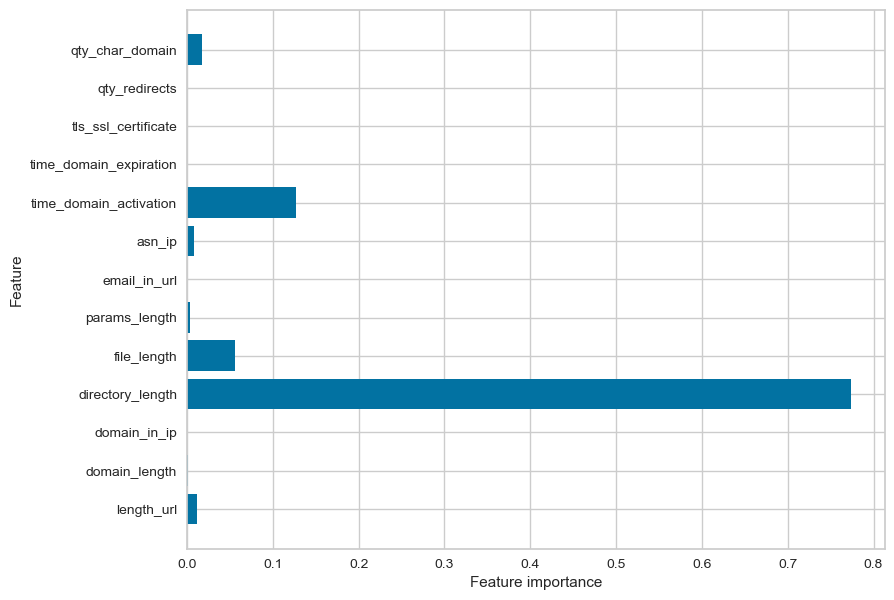

In [23]:
#Checking the feature importance of model
plt.figure(figsize=(9,7))
n_features =X_train.shape[1]
plt.barh(range(n_features),tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features),X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [24]:
#Storing the results
#Executing only once to avoid duplications
storeResults ('Decision Tree', acc_train_tree, acc_test_tree)

In [25]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Instantiate the model
forest = RandomForestClassifier(max_depth=5)
#Fitting the model
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [26]:
#Predicting the target value from the model for the samples
y_test_forest= forest.predict(X_test)
y_train_forest= forest.predict(X_train)

In [27]:
#Computing the accuracy of the model performance
acc_train_forest= accuracy_score(y_train,y_train_forest)
acc_test_forest= accuracy_score(y_test,y_test_forest)

print("Random Forest: Accuracy on training data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on testing data: {:.3f}".format(acc_test_forest))

Random Forest: Accuracy on training data: 0.931
Random Forest: Accuracy on testing data: 0.928


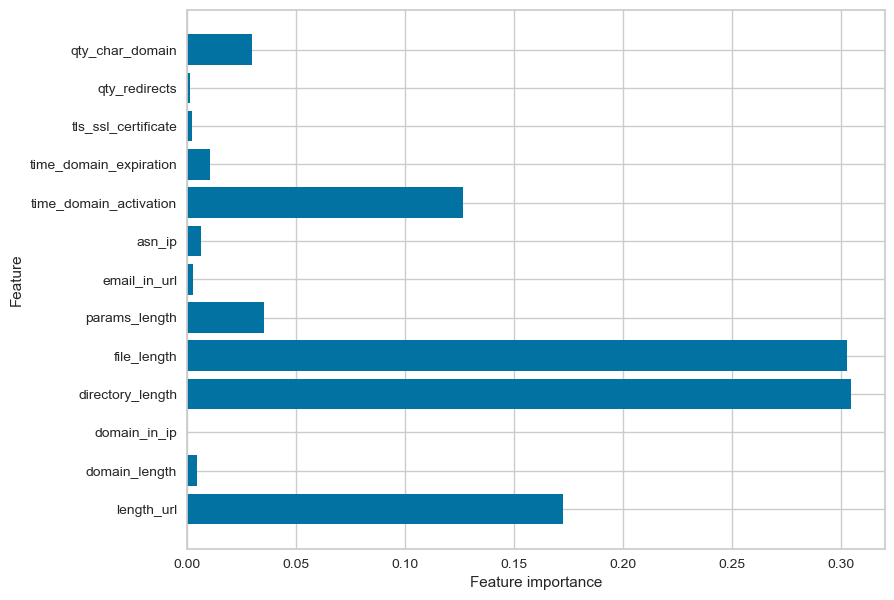

In [28]:
#Checking the feature importance of model
plt.figure(figsize=(9,7))
n_features =X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [29]:
#Storing the Results
#Execute only once to avoid duplications
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [30]:
#MultiLayer Perceptrons: Deep Learning
from sklearn.neural_network import MLPClassifier
#instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes= ([100,100,100]))
#Fitting the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [31]:
#Predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [32]:
#predicting the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
 
print("Multilayer Perceptrons: Accuracy on training data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on testing data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training data: 0.908
Multilayer Perceptrons: Accuracy on testing data: 0.905


In [33]:
#Storing the results
#Execute only once to avoid duplication
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [34]:
#XGBoost Classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#Fitting the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [35]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [36]:
#Computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train, y_train_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_xgb)

print("XGBoost: Accuracy on training data: {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on testing data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training data: 0.983
XGBoost: Accuracy on testing data: 0.966


In [37]:
#Storing the results
#Execute only once to avoid duplication
storeResults('XGBOOST Classifier', acc_train_xgb, acc_test_xgb)

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = input_dim

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim - 2), activation="relu")(encoder)
code = Dense(int(encoding_dim - 4), activation="relu")(encoder)

# Decoder
decoder = Dense(int(encoding_dim - 2), activation="relu")(code)
decoder = Dense(encoding_dim, activation="relu")(decoder)
output_layer = Dense(input_dim, activation="sigmoid")(decoder)

# Build and compile the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse'])  # MSE loss for reconstruction

# Train the model
history = autoencoder.fit(
    X_train, X_train, 
    epochs=50, 
    batch_size=64, 
    shuffle=True, 
    validation_split=0.2
)




Epoch 1/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 242518800.0000 - mse: 242517248.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 2/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 3/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 4/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 5/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 6/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 7/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - v

887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 46/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 47/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 48/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 49/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000
Epoch 50/50
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242517232.0000 - mse: 242517232.0000 - val_loss: 241876784.0000 - val_mse: 241876784.0000


In [39]:
# Compute the reconstruction error
train_reconstructions = autoencoder.predict(X_train)
train_reconstruction_error = np.mean(np.square(X_train - train_reconstructions), axis=1)

test_reconstructions = autoencoder.predict(X_test)
test_reconstruction_error = np.mean(np.square(X_test - test_reconstructions), axis=1)

# Set threshold based on the 95th percentile of the training error
threshold = np.percentile(train_reconstruction_error, 95)

# Predict based on reconstruction error threshold
y_train_pred = (train_reconstruction_error > threshold).astype(int)
y_test_pred = (test_reconstruction_error > threshold).astype(int)



2217/2217 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step


In [40]:
# Ensure y_train and y_test labels are binary as well
y_train_labels = y_train.astype(int)
y_test_labels = y_test.astype(int)
# Calculate accuracy on training and test data
acc_train_auto = accuracy_score(y_train_labels, y_train_pred)
acc_test_auto = accuracy_score(y_test_labels, y_test_pred)



print("\nAutoencoder-based accuracy on training data: {:.3f}".format(acc_train_auto))
print("Autoencoder-based accuracy on test data: {:.3f}".format(acc_test_auto))



Autoencoder-based accuracy on training data: 0.646
Autoencoder-based accuracy on test data: 0.643


In [41]:

#Storing the results
storeResults('Autoencoder',acc_train_auto,acc_test_auto)

In [42]:
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import StandardScaler
# Scale the features (important for CatBoost if features vary significantly in range)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=1000,  # Number of boosting iterations
                                    learning_rate=0.05,  # Learning rate
                                    depth=6,  # Depth of the trees
                                    loss_function='Logloss',  # Loss function for classification
                                    cat_features=[],  # List of categorical feature indices, if any
                                    verbose=200)  # Show training progress every 200 iterations

# Train the model
catboost_model.fit(X_train_scaled, y_train)


0:	learn: 0.6026557	total: 170ms	remaining: 2m 49s
200:	learn: 0.1243185	total: 1.72s	remaining: 6.83s
400:	learn: 0.1068469	total: 3.24s	remaining: 4.84s
600:	learn: 0.0970464	total: 4.74s	remaining: 3.14s
800:	learn: 0.0905018	total: 6.25s	remaining: 1.55s
999:	learn: 0.0854001	total: 7.75s	remaining: 0us


In [43]:
# Make predictions
y_test_pred = catboost_model.predict(X_test_scaled)

y_train_pred = catboost_model.predict(X_train_scaled)

#Calculate Accuracy

acc_train_cat = accuracy_score(y_train, y_train_pred)
acc_test_cat= accuracy_score(y_test, y_test_pred)

# Print the results

print("\nCatBoostClassifier accuracy on training data: {:.3f}".format(acc_train_cat))
print("CatBoostClassifier accuracy on test data: {:.3f}".format(acc_test_cat))


CatBoostClassifier accuracy on training data: 0.970
CatBoostClassifier accuracy on test data: 0.963


In [44]:
#Storing the results
storeResults('CatBoost Classifier',acc_train_cat,acc_test_cat)

In [45]:
!pip install lightgbm

In [46]:
from lightgbm import LGBMClassifier
# LightGBM model
lgbm_model = LGBMClassifier(n_estimators=1000,  # Number of boosting iterations
                            learning_rate=0.05,  # Learning rate
                            num_leaves=31,  # Number of leaves in a tree (affects model complexity)
                            max_depth=6,  # Depth of the tree
                            verbose=-1)  # Suppress training output

# Train the model
lgbm_model.fit(X_train_scaled, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=None, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [47]:
# Make predictions 
y_train_pred_lgbm = lgbm_model.predict(X_train_scaled)
y_test_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Calculate accuracy 
acc_train_lgbm = accuracy_score(y_train, y_train_pred_lgbm)
acc_test_lgbm = accuracy_score(y_test, y_test_pred_lgbm)

# Print the results

print("\nLGBM Classifier accuracy on training data: {:.3f}".format(acc_train_lgbm))
print("LGBM Classifier accuracy on test data: {:.3f}".format(acc_test_lgbm))


LGBM Classifier accuracy on training data: 0.980
LGBM Classifier accuracy on test data: 0.965


In [48]:
#Storing the results
storeResults('LGBM Classifier',acc_train_lgbm,acc_test_lgbm)

In [49]:
#Creating dataframe
results= pd.DataFrame({'ML MODEL': ML_Model, 'Train Accuracy': acc_train, 'Test Accuracy': acc_test})
results

,ML MODEL,Train Accuracy,Test Accuracy
0,Decision Tree,0.932,0.929
1,Random Forest,0.931,0.928
2,Multilayer Perceptrons,0.908,0.905
3,XGBOOST Classifier,0.983,0.966
4,Autoencoder,0.646,0.643
5,CatBoost Classifier,0.970,0.963
6,LGBM Classifier,0.980,0.965


In [50]:
#Sorting the dataframe on accuracy
results.sort_values(by=['Test Accuracy','Train Accuracy'], ascending=False)

,ML MODEL,Train Accuracy,Test Accuracy
3,XGBOOST Classifier,0.983,0.966
6,LGBM Classifier,0.980,0.965
5,CatBoost Classifier,0.970,0.963
0,Decision Tree,0.932,0.929
1,Random Forest,0.931,0.928
2,Multilayer Perceptrons,0.908,0.905
4,Autoencoder,0.646,0.643


In [51]:
import pickle
with open('lgbm_model.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)

In [52]:
with open('lgbm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use the loaded model for predictions
predictions = loaded_model.predict(X_test)